In [2]:
from tqdm import tqdm
from video_utils import *
from anns import *
import pickle
from sklearn.cluster import KMeans
import numpy as np
import cv2
from video_utils import plot_image
from PIL import Image
import matplotlib.pyplot as plt

In [1]:
%load_ext autoreload
%autoreload 2

# BS

In [64]:

with open("colors.pkl", "rb") as f:
    colors = pickle.load(f)

with open("detection.pkl", "rb") as f:
    detection = pickle.load(f)

with open("image.pkl", "rb") as f:
    image = pickle.load(f)


In [65]:

colors = colors.reshape(colors.shape[:2])

kmeans = KMeans(n_clusters=2, random_state=0).fit(colors)
kmeans.fit(colors)
# get the cluster of the detection color
x2, y2 = detection.rect.bottom_right.int_xy_tuple
x1, y1 = detection.rect.top_left.int_xy_tuple
crop = image[y1:y2, x1:x2]
b, g, r = cv2.mean(crop)[:3]
detection_color = np.array([r, g, b]).reshape(1, 3)


detection_cluster = kmeans.predict(detection_color)

print(detection_cluster)

[0]


/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
kmeans.cluster_centers_[detection_cluster[0]]

array([     122.02,      157.11,      102.57])

In [67]:
kmeans.cluster_centers_

array([[     122.02,      157.11,      102.57],
       [     140.36,      161.32,       137.9]])

In [68]:
other_cluster =  kmeans.cluster_centers_[0 if detection_cluster[0] == 1 else 1]
other_cluster

array([     140.36,      161.32,       137.9])

In [69]:
kmeans.cluster_centers_

array([[     122.02,      157.11,      102.57],
       [     140.36,      161.32,       137.9]])

In [74]:
from posession_utils import *


In [77]:
posession_pipeline = PosessionPipeline()

curr_color_in_posession = posession_pipeline.cluster_color(
    image=None,
    detection=[],
)

curr_color_in_posession

(None, None)

In [78]:
## load team_colors from pickle
with open("team_colors.pkl", "rb") as f:
    team_colors = pickle.load(f)
    

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

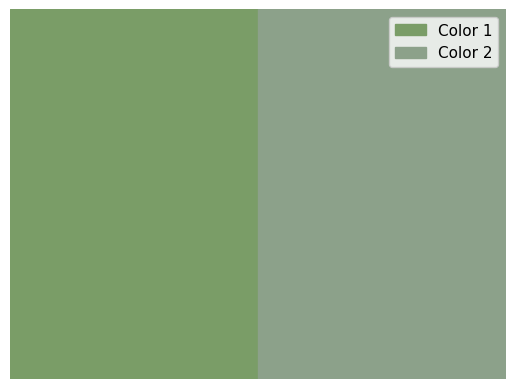

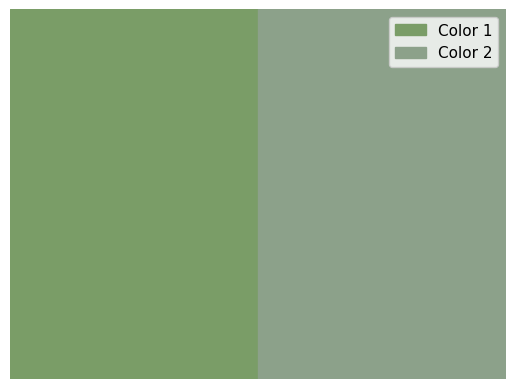

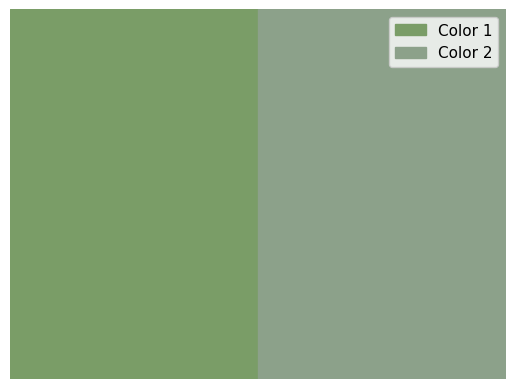

In [85]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot a rectangle filled with color1
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=[c / 255 for c in team_colors["1"].to_array()], label='Color 1'))

# Plot a rectangle filled with color2
ax.add_patch(plt.Rectangle((1, 0), 1, 1, color=[c / 255 for c in team_colors["2"].to_array()], label='Color 2'))

# Set axis limits
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

# Remove axis labels and ticks
ax.axis('off')

# Add a legend
ax.legend()

# Display the colors
plt.show()

In [2]:
from PIL import Image

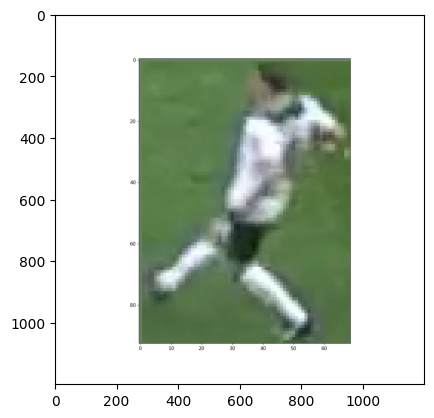

In [72]:
## read image.png image
image = np.array(Image.open("image_white.png"))

plt.imshow(image)

(369, 496, 4)


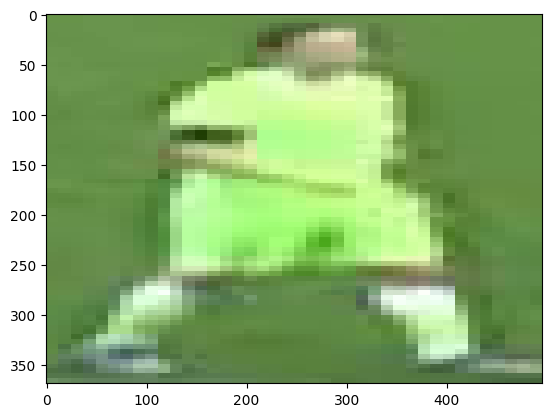

In [83]:
image = "crop"

image = np.array(Image.open(f"{image}.png", "r"))

print(image.shape)
plt.imshow(image)

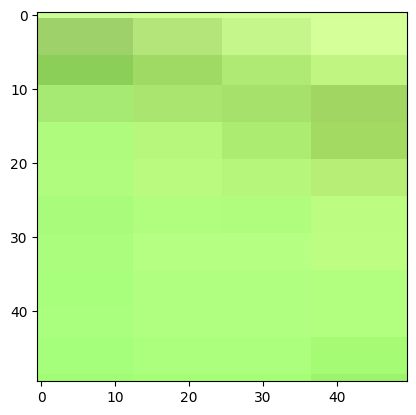

In [106]:

h = int(image.shape[0] / 2)
w = int(image.shape[1] / 2)
center_crop = image[h -25 : h + 25, w -25 :w + 25, :]

plt.imshow(center_crop)

In [101]:
# get pixel color at center of image
r,g,b = cv2.mean(image[int(h) : int(h) + 25, int(w): int(w) + 25, :])[:3]
print(b, g, r)

125.9616 253.83040000000003 177.5216


In [102]:
color = np.array([r, g, b]).reshape(1, 3)
color

array([[177.5216, 253.8304, 125.9616]])

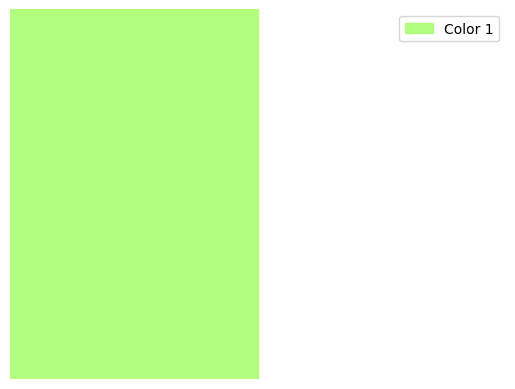

In [103]:
fig, ax = plt.subplots()

ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=[c / 255 for c in color[0]], label='Color 1'))

ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.axis('off')

ax.legend()

plt.show()

# HSV

In [157]:
import glob
from PIL import Image
import cv2
import numpy as np
from sklearn.cluster import KMeans
from video_utils import plot_image


In [167]:
def get_hsv_value(image):
  """Returns the HSV value of an image.

  Args:
    image: The image to get the HSV value of.

  Returns:
    The HSV value of the image.
  """

  # Convert the image to HSV format.
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Get the HSV values of the image.
  h = hsv[:, :, 0]
  s = hsv[:, :, 1]
  v = hsv[:, :, 2]

  # Return the HSV values of the image.
  return [h, s, v]


In [168]:
crops = glob.glob("crops_2/*.png")

In [177]:
features = []

In [178]:
for crop in crops:
    im = cv2.imread(crop)
    h,s,v = get_hsv_value(im)
    features.append(np.array([h, s, v]).T)


In [179]:

features = np.array(features).reshape(len(crops),-1)
print(features.shape)

(19, 549072)


In [143]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")

In [144]:
kmeans.fit(features)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [174]:
h_s_v_1 = kmeans.cluster_centers_[0]
h_s_v_2 = kmeans.cluster_centers_[1]

[1]


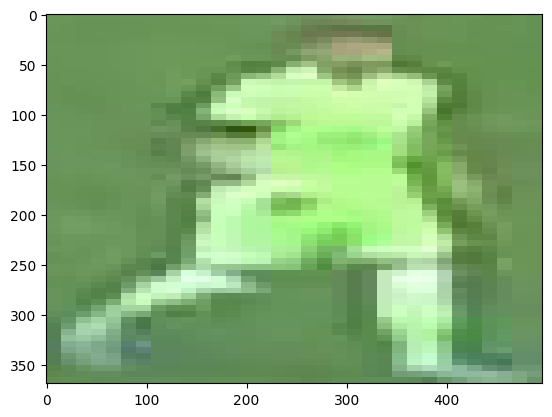

[0]


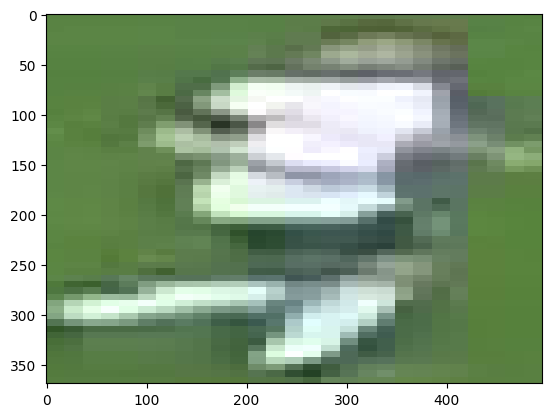

[1]


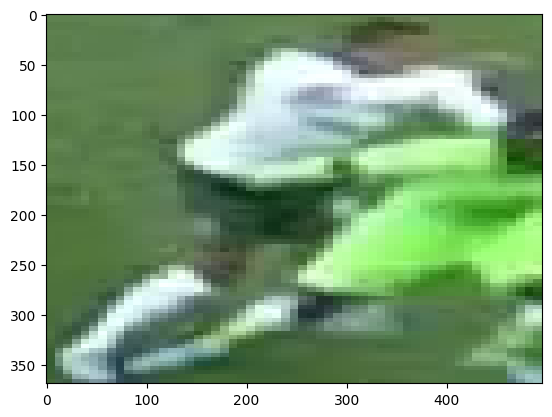

[0]


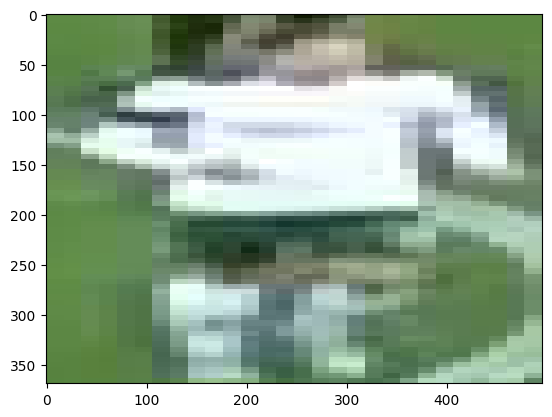

[1]


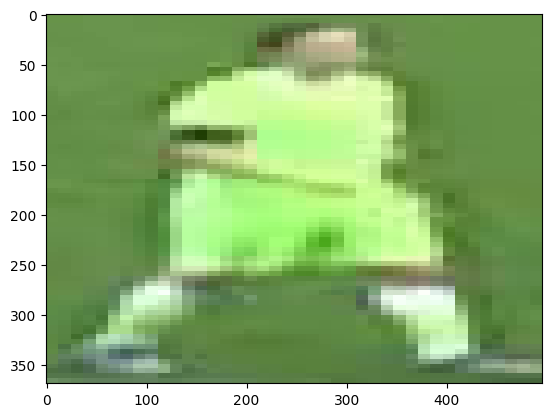

[1]


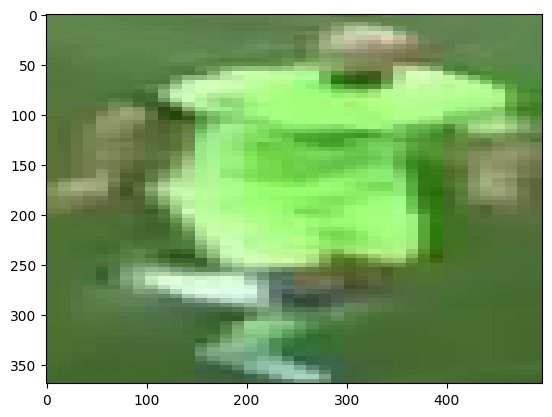

[1]


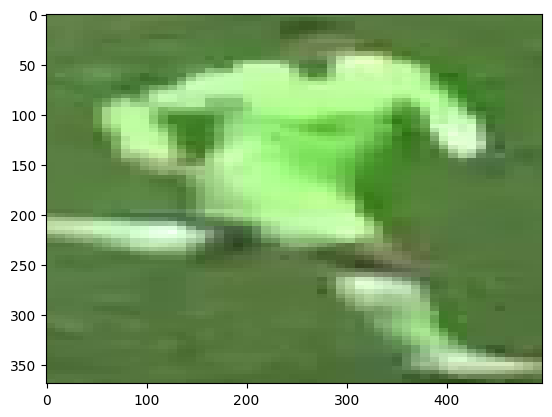

[1]


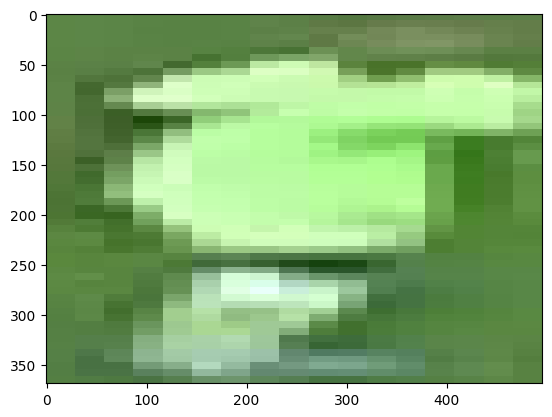

[0]


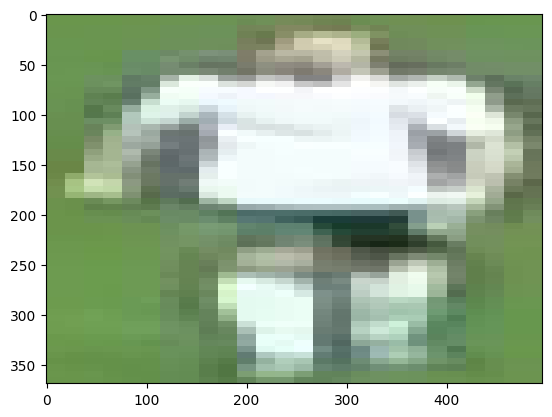

[0]


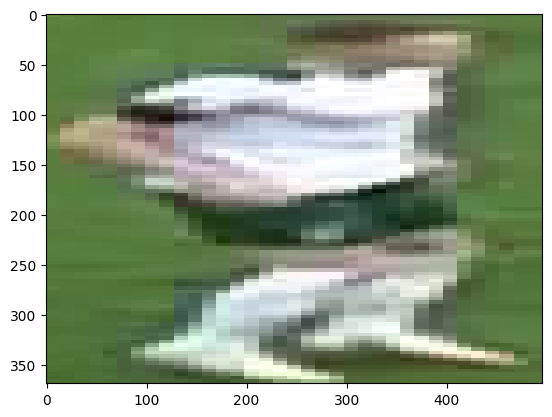

[0]


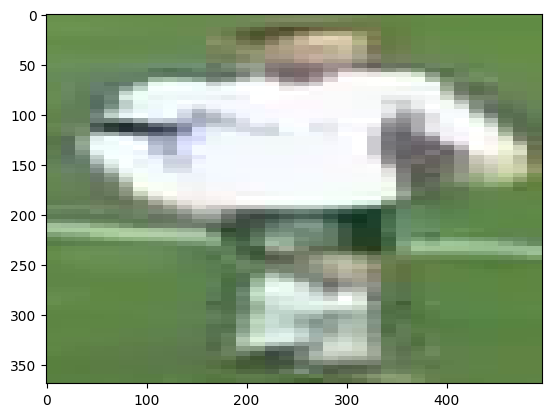

[1]


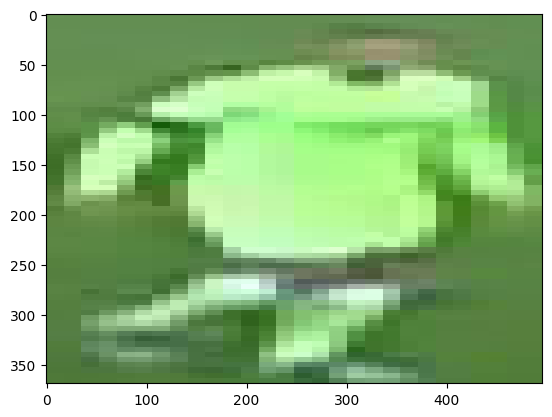

[1]


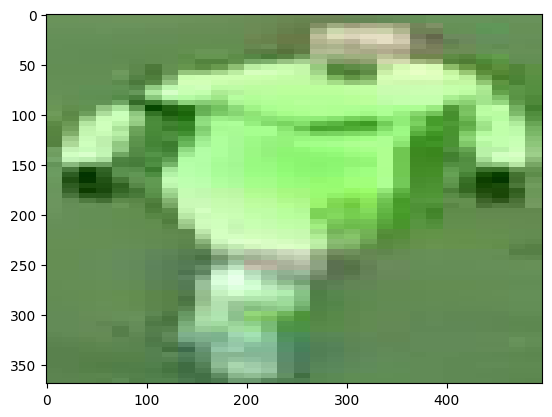

[0]


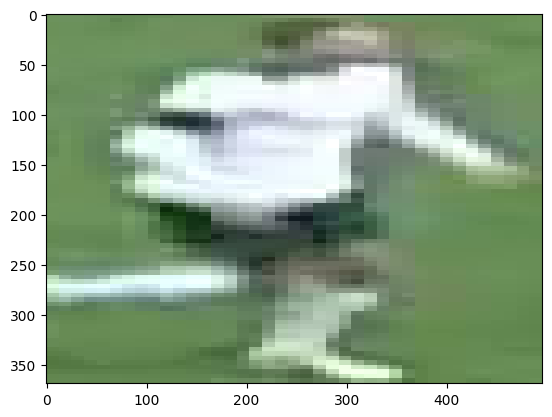

[1]


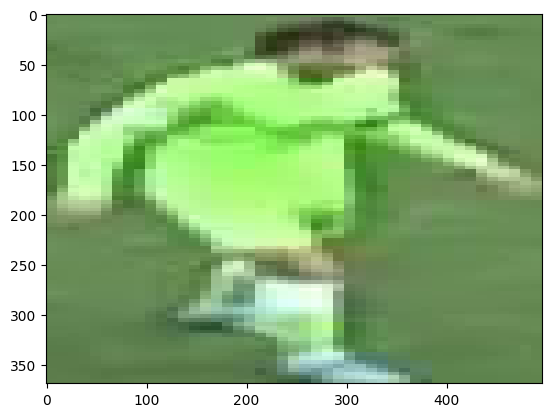

[0]


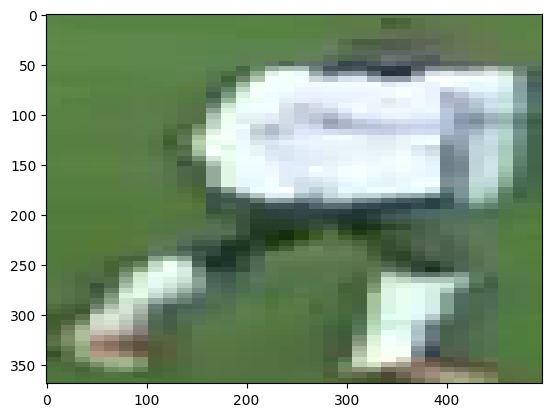

[1]


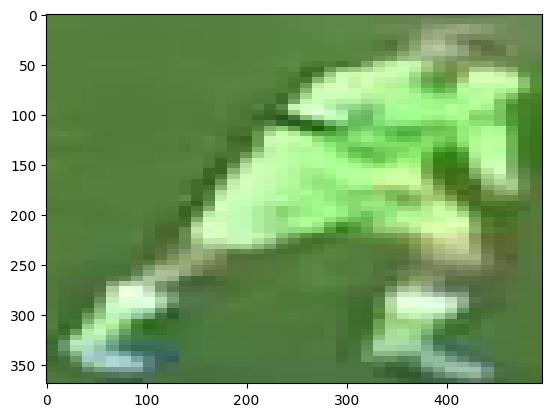

[0]


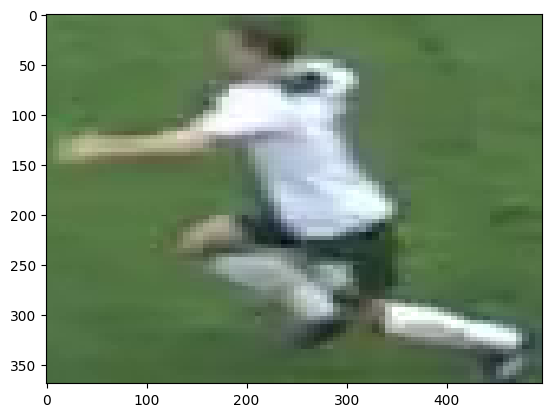

[0]


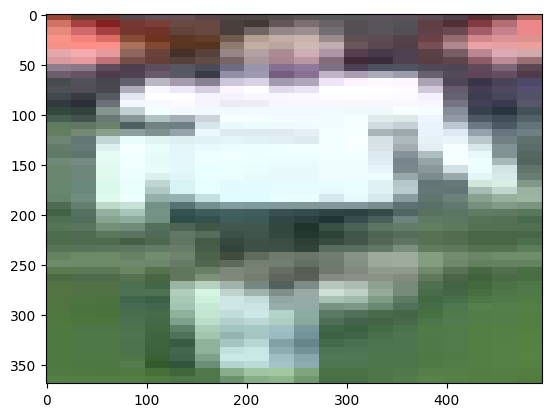

In [176]:
for crop in crops:
    im = cv2.imread(crop)
    h,s,v = get_hsv_value(im)
    #print('HSV Value of image is:', (h, s, v))
    detection_cluster = kmeans.predict(np.array([h, s, v]).T.reshape(1,-1))
    print(detection_cluster)
    plot_image(im, save=False)